In [1]:
import pandas as pd


def read_count_data(count_file, bed_file):
    count_data = pd.read_csv(
        count_file,
        sep = '\t'
    )
    count_data.columns = \
        ['chr', 'start', 'end'] + \
        [column[1:-1].split('.')[0] for column in count_data.columns[3:]]

    bed = pd.read_csv(
        bed_file,
        sep = '\t',
        header = None,
        names = ['chr', 'start', 'end', 'name', 'score', 'strand']
    )

    count_data = count_data \
        .sort_values(['chr', 'start', 'end']) \
        .reset_index(drop = True)

    bed = bed \
        .sort_values(['chr', 'start', 'end']) \
        .reset_index(drop = True)
    
    count_data['name'] = bed.name
    
    return count_data, bed


gene_tss_promoter, gene_tss_promoter_bed = read_count_data(
    'counts/genes_tss_promoters.tsv',
    'genes_tss_promoters.bed'
)
gene_tss_promoter

,chr,start,end,h3k27ac_nt_R1,h3k27ac_nt_R2,h3k27ac_sat1_R1,h3k27ac_sat1_R2,h3k4me1_nt_R1,h3k4me1_nt_R2,h3k4me1_sat1_R1,h3k4me1_sat1_R2,name
0,chr1,10868,11868,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ENSG00000290825.1;DDX11L2-promoter
1,chr1,11009,12009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ENSG00000223972.6;DDX11L1-promoter
2,chr1,11368,12368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ENSG00000290825.1;DDX11L2-tss
3,chr1,11509,12509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ENSG00000223972.6;DDX11L1-tss
4,chr1,11868,14409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ENSG00000290825.1;DDX11L2
...,...,...,...,...,...,...,...,...,...,...,...,...
189556,chrY,57206845,57207845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ENSG00000292372.1;WASH6P-tss
189557,chrY,57207345,57212230,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ENSG00000292372.1;WASH6P
189558,chrY,57212183,57214397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ENSG00000292371.1;DDX11L16
189559,chrY,57213897,57214897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ENSG00000292371.1;DDX11L16-tss


In [3]:
columns = ['chr', 'start', 'end', 'name']
(gene_tss_promoter[columns] == gene_tss_promoter_bed[columns]).all(axis = None)

True

In [4]:
def get_interval_type(interval_name):
    types = set(['promoter', 'tss'])
    interval_type = interval_name.split('-')[-1]
    if interval_type not in types:
        return 'gene'
    
    return interval_type


gene_tss_promoter['intervaltype'] = gene_tss_promoter.name.apply(
    get_interval_type
)
gene_tss_promoter

,chr,start,end,h3k27ac_nt_R1,h3k27ac_nt_R2,h3k27ac_sat1_R1,h3k27ac_sat1_R2,h3k4me1_nt_R1,h3k4me1_nt_R2,h3k4me1_sat1_R1,h3k4me1_sat1_R2,name,intervaltype
0,chr1,10868,11868,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ENSG00000290825.1;DDX11L2-promoter,promoter
1,chr1,11009,12009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ENSG00000223972.6;DDX11L1-promoter,promoter
2,chr1,11368,12368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ENSG00000290825.1;DDX11L2-tss,tss
3,chr1,11509,12509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ENSG00000223972.6;DDX11L1-tss,tss
4,chr1,11868,14409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ENSG00000290825.1;DDX11L2,gene
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189556,chrY,57206845,57207845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ENSG00000292372.1;WASH6P-tss,tss
189557,chrY,57207345,57212230,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ENSG00000292372.1;WASH6P,gene
189558,chrY,57212183,57214397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ENSG00000292371.1;DDX11L16,gene
189559,chrY,57213897,57214897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ENSG00000292371.1;DDX11L16-tss,tss


In [5]:
count_tables = {
    k: gene_tss_promoter.loc[gene_tss_promoter.intervaltype == k, :].copy() for k in ['gene', 'promoter', 'tss']
}
for table in count_tables.values():
    table.drop(
        columns = ['intervaltype'],
        inplace = True
    )

In [6]:
genes_extended, genes_extended_bed = read_count_data(
    'counts/genes.extended.tsv',
    'genes.extended.bed'
)
genes_extended

,chr,start,end,h3k27ac_nt_R1,h3k27ac_nt_R2,h3k27ac_sat1_R1,h3k27ac_sat1_R2,h3k4me1_nt_R1,h3k4me1_nt_R2,h3k4me1_sat1_R1,h3k4me1_sat1_R2,name
0,chr1,10868,14409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ENSG00000290825.1;DDX11L2
1,chr1,11009,13670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ENSG00000223972.6;DDX11L1
2,chr1,14695,24886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ENSG00000227232.6;WASH7P
3,chr1,17368,17436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ENSG00000278267.1;MIR6859-1
4,chr1,28553,31109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ENSG00000243485.5;MIR1302-2HG
...,...,...,...,...,...,...,...,...,...,...,...,...
63182,chrY,57183215,57197337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ENSG00000292373.1;IL9R
63183,chrY,57189737,57208756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ENSG00000292369.1;ENSG00000292369
63184,chrY,57201142,57203357,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ENSG00000292370.1;WASIR1
63185,chrY,57206345,57212230,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ENSG00000292372.1;WASH6P


In [7]:
columns = ['chr', 'start', 'end', 'name']
(genes_extended[columns] == genes_extended_bed[columns]).all(axis = None)

True

In [8]:
count_tables['extended_gene'] = genes_extended
count_tables

{'gene':          chr     start       end  h3k27ac_nt_R1  h3k27ac_nt_R2  \
 4       chr1     11868     14409            0.0            0.0   
 5       chr1     12009     13670            0.0            0.0   
 6       chr1     14695     24886            0.0            0.0   
 8       chr1     17368     17436            0.0            0.0   
 15      chr1     29553     31109            0.0            0.0   
 ...      ...       ...       ...            ...            ...   
 189548  chrY  57184215  57197337            0.0            0.0   
 189551  chrY  57190737  57208756            0.0            0.0   
 189552  chrY  57201142  57203357            0.0            0.0   
 189557  chrY  57207345  57212230            0.0            0.0   
 189558  chrY  57212183  57214397            0.0            0.0   
 
         h3k27ac_sat1_R1  h3k27ac_sat1_R2  h3k4me1_nt_R1  h3k4me1_nt_R2  \
 4                   0.0              0.0            0.0            0.0   
 5                   0.0            

In [9]:
def filter_genes(count_table, count_threshold, mode = 'all'):
    non_data_columns = ['chr', 'start', 'end', 'name']
    data_columns = ~count_table.columns.isin(non_data_columns)
    threshold_comparison = count_table.loc[:, data_columns] >= count_threshold
    
    if mode == 'all':
        retain_index = threshold_comparison.all(axis = 1)
        
    else:
        retain_index = threshold_comparison.any(axis = 1)
        
    return count_table[retain_index].copy()

data = {}
datasets = ['h3k4me1', 'h3k27ac']
for dataset in datasets:
    for k, count_table in count_tables.items():
        non_data_columns = ['chr', 'start', 'end', 'name']
        data_columns = count_table.columns[count_table.columns.str.contains(dataset)].to_list()
        data[f'{k}_{dataset}'] = filter_genes(count_table[non_data_columns + data_columns], 10)

In [10]:
# output data for differential binding analysis with R

for k, df in data.items():
    df = df.drop(columns = ['chr', 'start', 'end'])
    df.set_index('name', inplace = True)
    metadata = pd.DataFrame(
        [col.split('_') for col in df.columns],
        columns = ['datatype', 'condition', 'replicate']
    )
    metadata.index = df.columns
    df.to_csv(f'diffbind/{k}.count.csv')
    metadata.to_csv(f'diffbind/{k}.meta.csv')

In [9]:
import numpy as np


def normalize_data(count_table, log = True):
    non_data_columns = ['chr', 'start', 'end', 'name']
    data_columns = count_table.columns[
        ~count_table.columns.isin(non_data_columns)
    ]
    
    count_table = count_table.copy()
    for column in data_columns:
        normalized_column = count_table[column] * 1e6 / count_table[column].sum()
        count_table[column] = (
            np.log1p(normalized_column) 
            if log 
            else normalized_column
        )
        
    return count_table


def average_data(count_table, index_grouper, additional_non_data_columns = []):
    non_data_columns = ['chr', 'start', 'end'] + additional_non_data_columns
    data_columns = ~count_table.columns.isin(non_data_columns)
    
    data = count_table.loc[:, data_columns].T
    
    for column, iterable in index_grouper.items():
        data[column] = ''
        for item in iterable:
            data.loc[data.index.str.contains(item), column] = item
            
    keys = list(index_grouper.keys())
    
    averaged_data = data \
        .groupby(keys) \
        .mean() \
        .reset_index()
    
    averaged_data.index = averaged_data[keys].apply(
        lambda x: '_'.join(x),
        axis = 1
    )
    averaged_data = averaged_data.drop(columns = keys).T
    
    for column in non_data_columns:
        averaged_data[column] = count_table[column]
        
    return averaged_data


averaged_data = {}
for k, count_table in data.items():
    normalized_data = normalize_data(count_table)
    averaged_data[k] = average_data(
        normalized_data,
        {'condition': ['nt', 'sat1']},
        ['name']
    )

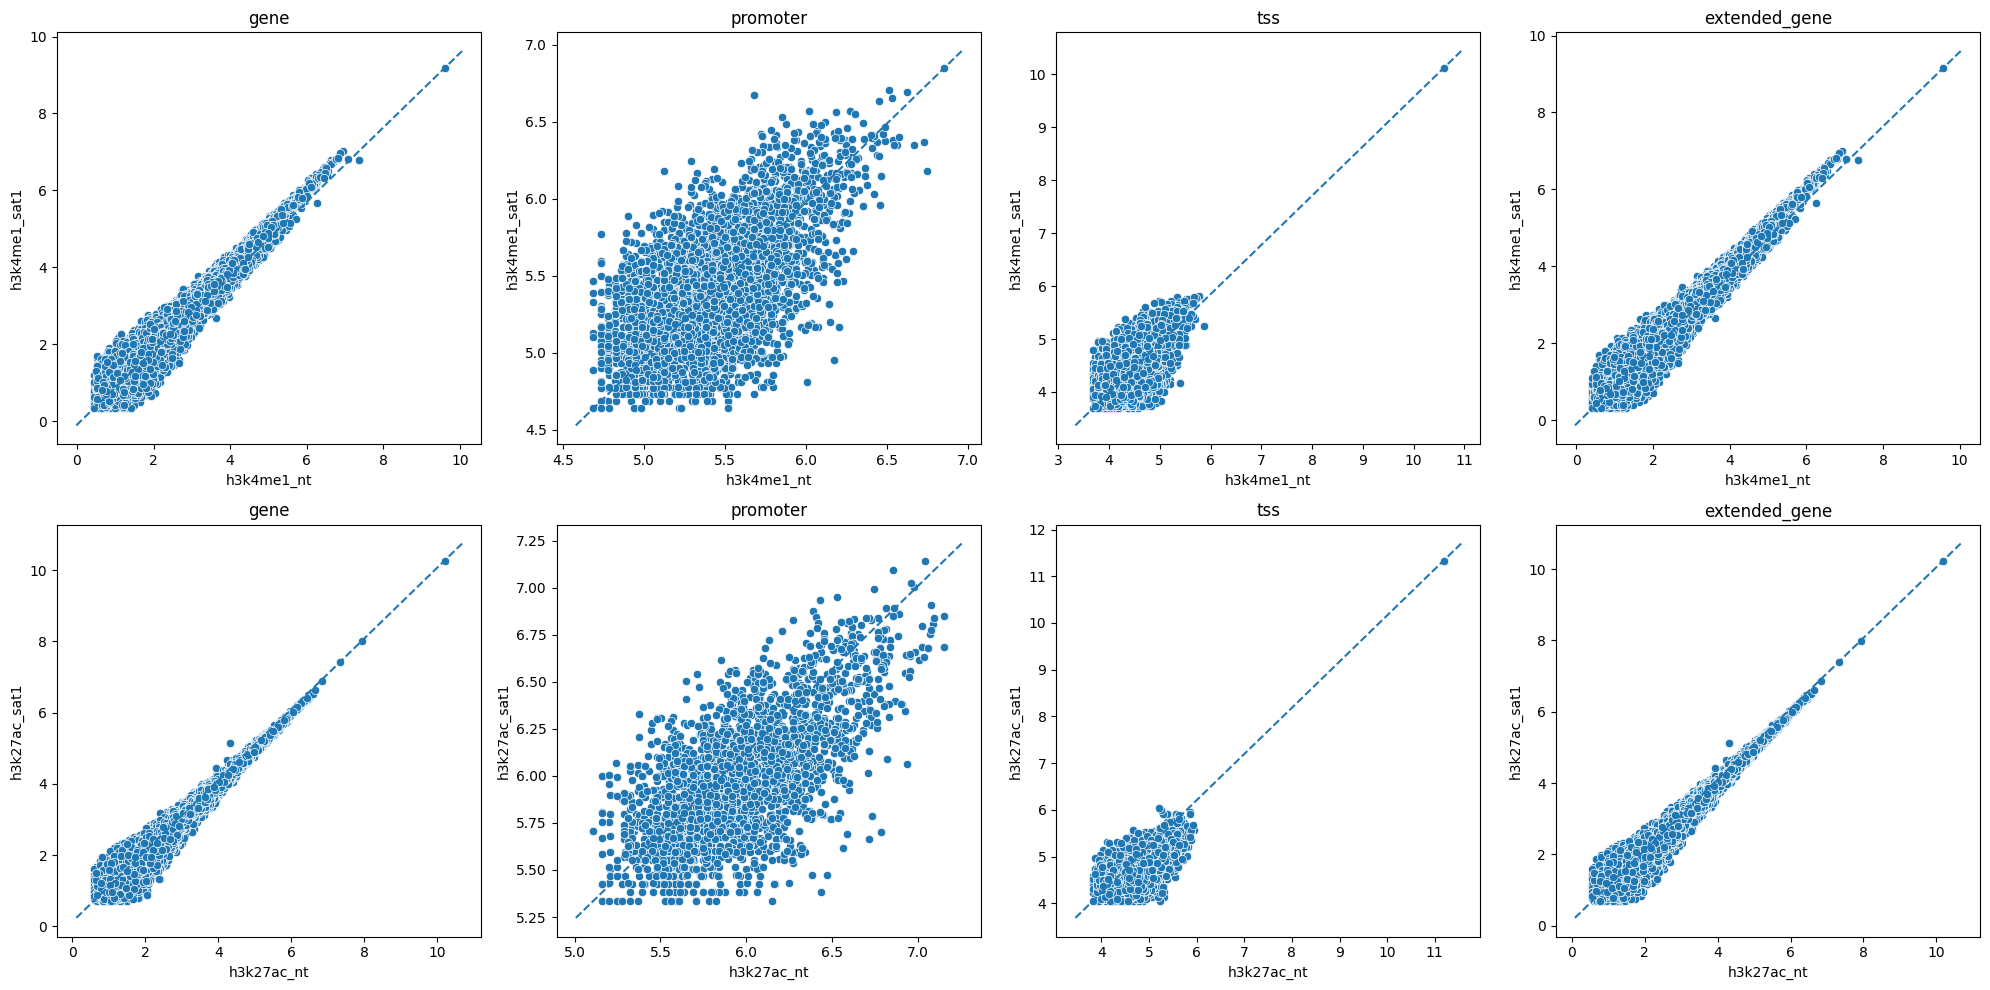

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


datasets = ['h3k4me1', 'h3k27ac']
beds = ['gene', 'promoter', 'tss', 'extended_gene']
fig, axs = plt.subplots(
    len(datasets), 
    len(beds)
)

for axs_row, dataset in zip(axs, datasets):
    for ax, k in zip(axs_row, beds):
        sns.scatterplot(
            data = averaged_data[f'{k}_{dataset}'],
            x = 'nt',
            y = 'sat1',
            ax = ax
        )
        ax.set_title(k)
        ax.set_xlabel(f'{dataset}_nt')
        ax.set_ylabel(f'{dataset}_sat1')
        
        ax.plot(
            ax.get_xlim(),
            ax.get_ylim(),
            ls = '--'
        )

fig.set_figwidth(20)
fig.set_figheight(10)
fig.tight_layout()